<a href="https://colab.research.google.com/github/Koushikl0l/StockHound/blob/main/Demo2_StockHound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def create_time_series_dataset_pandas(df, target_col, time_step=1):
    y = df[target_col].values
    X_df = df.drop(columns=[target_col])
    X_array = X_df.values

    X_data, y_data = [], []

    for i in range(len(df) - time_step):
        feature_window = X_array[i:(i + time_step), :]
        X_data.append(feature_window)
        y_data.append(y[i + time_step])

    return np.array(X_data), np.array(y_data)

# def train_test_split(X, y, train_size=0.8):
#     split_index = int(len(X) * train_size)
#     X_train, X_test = X[:split_index], X[split_index:]
#     y_train, y_test = y[:split_index], y[split_index:]

#     return X_train, y_train, X_test, y_test

def train_test_validation_split(X, y, train_size=0.7, test_split=0.6):
    # Split the data into train and test based on the given train_size (70% for training)
    split_index_train = int(len(X) * train_size)
    X_train, X_test_val = X[:split_index_train], X[split_index_train:]
    y_train, y_test_val = y[:split_index_train], y[split_index_train:]

    # Further split the test data into test and validation (60% test, 40% validation)
    test_split_index = int(len(X_test_val) * test_split)
    X_test, X_val = X_test_val[:test_split_index], X_test_val[test_split_index:]
    y_test, y_val = y_test_val[:test_split_index], y_test_val[test_split_index:]

    return X_train, y_train, X_test, y_test, X_val, y_val


def Scaling(df):

      return pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df),columns=df.columns)

def inverse_transform(data_scaled, min_original, max_original):

       # Inverse Min-Max scaling to return to the original scale
       return min_original + data_scaled * (max_original - min_original)


In [39]:
# # Example usage
# dataset = {
#     'low': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#     'high': [15, 25, 35, 45, 55, 65, 75, 85, 95, 105],
#     'open': [12, 22, 32, 42, 52, 62, 72, 82, 92, 102],
#     'inflation': [1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4],
#     'sentiment': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
#     'cpi': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
#     'close': [14, 24, 34, 44, 54, 64, 74, 84, 94, 104]
# }
# df = pd.DataFrame(dataset)

# X, y = create_time_series_dataset_pandas(df.iloc[0:7,:], target_col='close', time_step=3)
# X_train, y_train, X_test, y_test = train_test_split(X, y, train_size=0.8)
# print(df)
# print("Training Features (X_train):\n", X_train)
# print("Training Targets (y_train):", y_train)
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

In [29]:
##read the original data
data = pd.read_csv('/content/drive/MyDrive/NEPSE/input_data.csv',index_col=0)
output_dir_path = '/content/drive/MyDrive/NEPSE/'
data['Date']=pd.to_datetime(data['Date']).dt.date
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Volume,MACD,RSI,ATR,MFI,CPI,USDX,IR,TB,EFFR,RMT,Score
Date,,,,,,,,,,,,,,,,
2016-07-17,1718.15,1749.96,1715.14,1745.74,2272045,-37.509420,74.940143,23.122890,70.196510,112.9,107.519,8.6,0.44,0.82,51.94,0.20955
2016-07-18,1745.74,1786.68,1745.74,1786.59,2870497,-41.071885,82.962838,24.395540,67.197424,112.9,107.519,8.6,0.44,0.82,51.94,0.21927
2016-07-19,1786.59,1813.42,1785.33,1800.47,2902127,-44.502170,84.862752,24.659430,65.486818,112.9,107.519,8.6,0.44,0.82,51.94,-0.02642
2016-07-20,1800.47,1813.44,1782.57,1786.84,3474801,-45.595275,75.342839,25.103042,55.037084,112.9,107.519,8.6,0.44,0.82,51.94,0.15107
2016-07-21,1786.84,1804.75,1779.71,1798.83,3154492,-46.888559,77.863404,25.098539,67.326060,112.9,107.519,8.6,0.44,0.82,51.94,0.12900


**Explanation of Key Concepts:**

Moving Average (MA):
The NEPSE close price and both the moving averages (20-day and 50-day) are plotted on the same graph to visualize how the moving averages interact with the actual stock price.


The moving averages help identify trends, with the shorter-term 20-day MA reacting more quickly to price changes compared to the 50-day MA, which shows broader market trends.

1.   MA_20: A 20-day simple moving average that smooths out short-term fluctuations in the data over a 20-day period.

2.   MA_50: A 50-day simple moving average that is used to understand longer-term trends in stock price data.

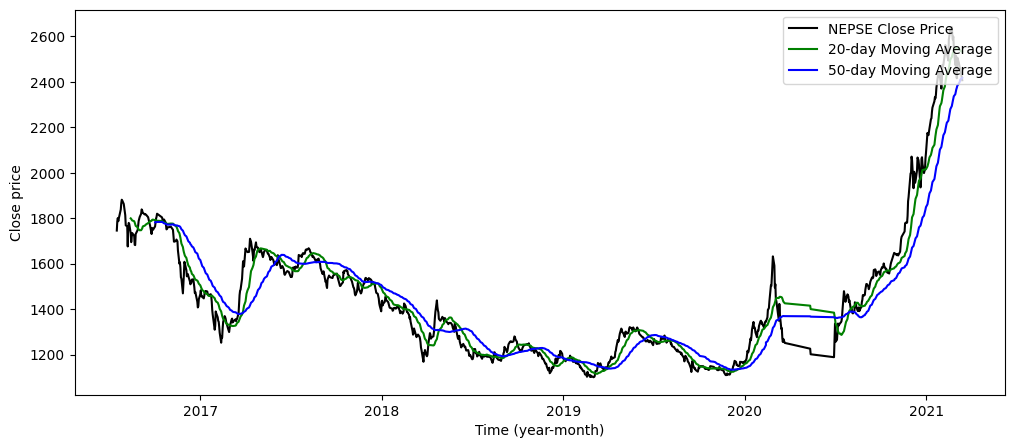

In [29]:
df = data.copy()
#fig = plt.figure(figsize = (15,4))
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()


fig = plt.figure(figsize=(12,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['NEPSE Close Price'])
plt.plot(df['MA_20'],'g', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])

plt.legend(['NEPSE Close Price', '20-day Moving Average', '50-day Moving Average'], loc='upper right')
plt.title('')
plt.xlabel('Time (year-month)')
plt.ylabel('Close price')

fig.savefig(output_dir_path+'original_data_plus_moving_averages.png',dpi=800)
plt.show()

In [30]:
Scaled_data = Scaling(data)
print(Scaled_data.iloc[0:7,:])
X, y = create_time_series_dataset_pandas(Scaled_data, target_col='Close', time_step=5)
X_train, y_train, X_test, y_test, X_val, y_val = train_test_validation_split(X, y)
print("Training Features (X_train):\n", X_train[0:7])
print("Training Targets (y_train):", y_train[0:7])
# print("Testing Features (X_test):\n", X_test)
# print("Testing Targets (y_test):", y_test)

       Open      High       Low     Close    Volume      MACD       RSI  \
0  0.394045  0.411250  0.405220  0.419000  0.087200  0.414759  0.745900   
1  0.411659  0.434650  0.425343  0.445530  0.110275  0.394676  0.831358   
2  0.437739  0.451690  0.451379  0.454545  0.111495  0.375338  0.851596   
3  0.446601  0.451703  0.449564  0.445693  0.133576  0.369176  0.750189   
4  0.437899  0.446165  0.447683  0.453480  0.121226  0.361885  0.777038   
5  0.445554  0.467730  0.460257  0.479237  0.182397  0.341350  0.843217   
6  0.470874  0.487159  0.485996  0.497428  0.226652  0.315911  0.874789   

        ATR       MFI       CPI      USDX   IR        TB     EFFR  RMT  \
0  0.264650  0.725950  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
1  0.286283  0.692080  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
2  0.290769  0.672762  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
3  0.298310  0.554749  0.019387  0.298415  1.0  0.054482  0.11611  0.0   
4  0.298234  0.693533  0.0193

Open      1.566320e+03
High      1.569240e+03
Low       1.520630e+03
Close     1.539760e+03
Volume    2.593485e+07
MACD      1.773867e+02
RSI       9.387908e+01
ATR       5.882786e+01
MFI       8.854762e+01
CPI       2.579000e+01
USDX      1.935090e+01
IR        6.300000e+00
TB        5.690000e+00
EFFR      6.890000e+00
RMT       8.273300e+02
Score     7.281300e-01
dtype: float64


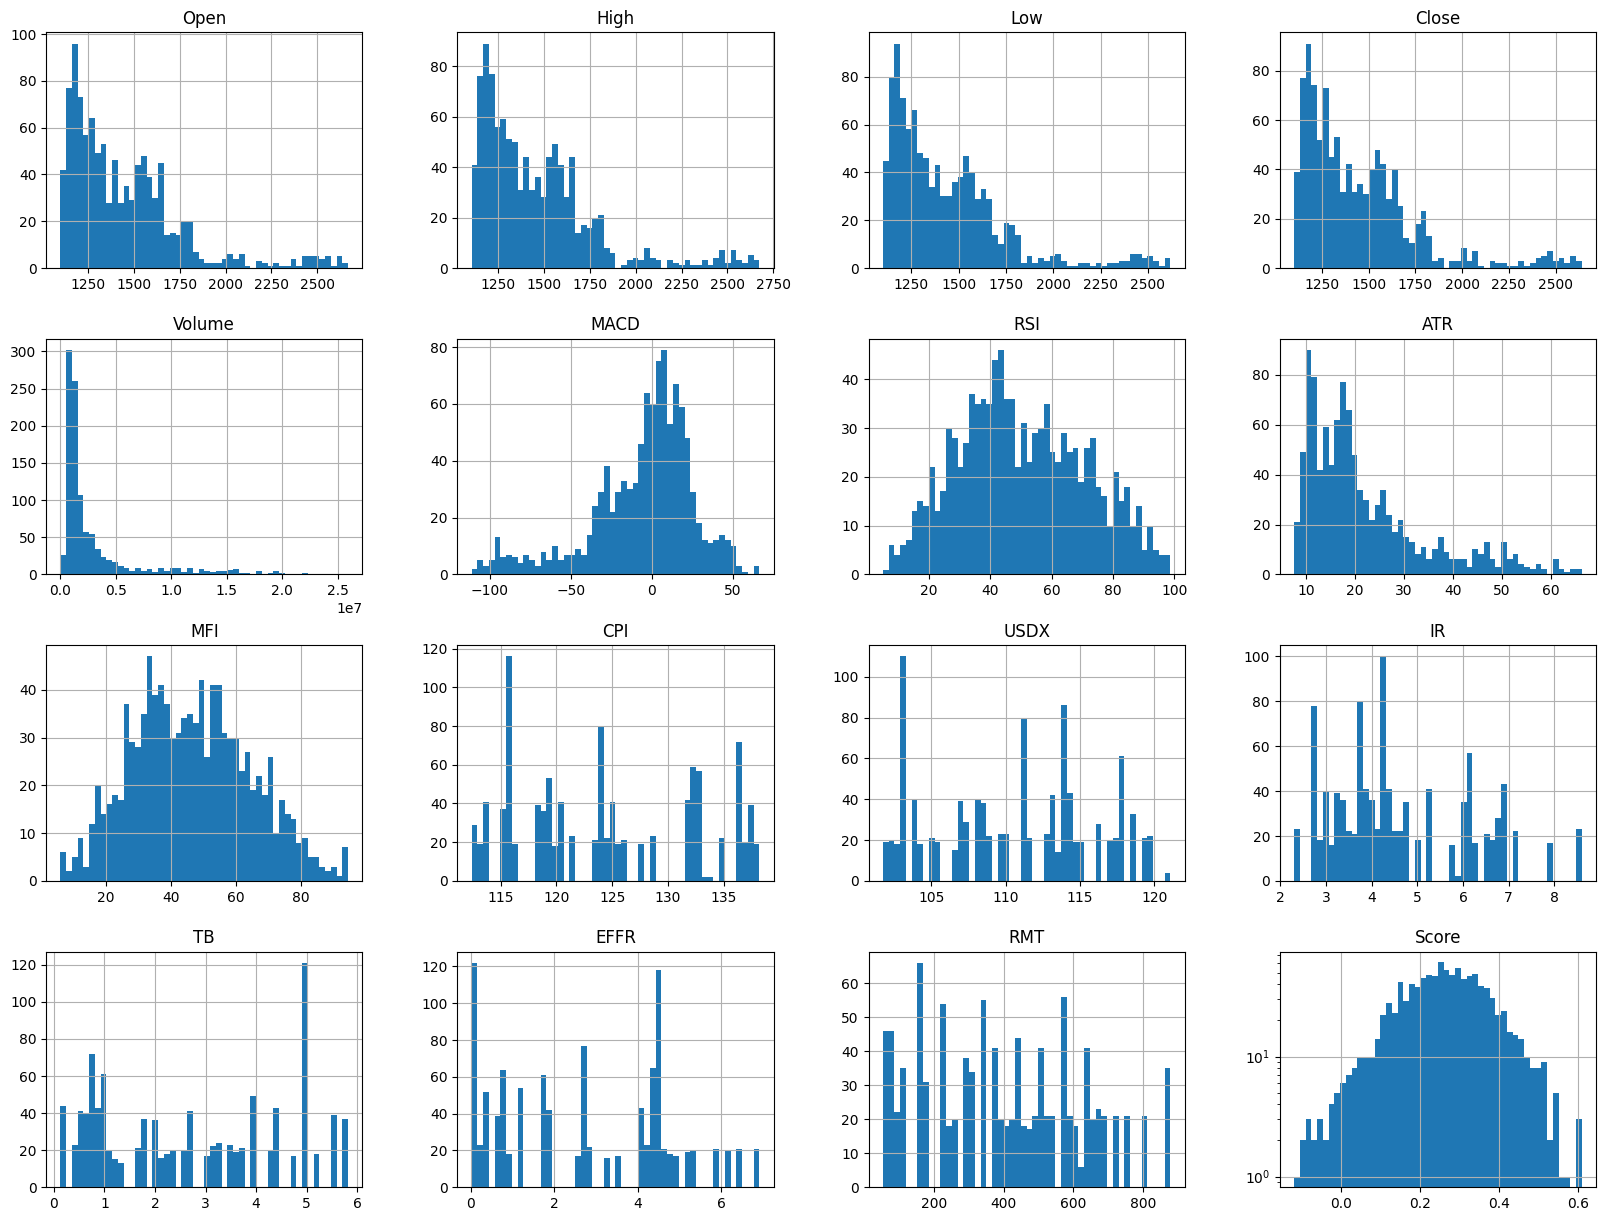

In [46]:
import matplotlib.pyplot as plt
print(data.max() - data.min())
data.hist(bins=50, figsize=(20, 15))
plt.yscale('log')
plt.show()


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

def build_lstm_model(input_shape, lstm_units=70, dropout_rate=0.3, dense_units=50, output_units=1, learning_rate=0.001, loss='mse'):
    model = Sequential()

    # First LSTM layer with L2 regularization, dropout, and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape,
                   kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Second LSTM layer with L2 regularization, dropout, and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=False, kernel_regularizer=l2(0.002)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Dense layer with L2 regularization
    model.add(Dense(units=dense_units, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())  # Adding Batch Normalization
    model.add(Dropout(dropout_rate))  # Dropout for regularization

    # Output layer
    model.add(Dense(units=output_units))

    # Compile the model with Adam optimizer and customizable learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss)

    return model

# Example usage:
# Assuming X_train has shape (num_samples, time_steps, num_features)
input_shape = (X_train.shape[1], X_train.shape[2])  # time_steps and num_features
model = build_lstm_model(input_shape, lstm_units=50, dropout_rate=0.2, dense_units=50, output_units=1, learning_rate=0.0005, loss='huber')

# EarlyStopping to monitor validation loss and stop training if it starts to overfit
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Learning rate reduction on plateau
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model (assuming you have already prepared your X_train, y_train, X_val, y_val)
history = model.fit(X_train, y_train, epochs=80, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping,
                                                                                                            #lr_scheduler
                                                                                                            ])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.7267 - val_loss: 0.4309
Epoch 2/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5411 - val_loss: 0.3883
Epoch 3/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4715 - val_loss: 0.3783
Epoch 4/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4774 - val_loss: 0.3350
Epoch 5/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4113 - val_loss: 0.3148
Epoch 6/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4247 - val_loss: 0.3526
Epoch 7/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3800 - val_loss: 0.3757
Epoch 8/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4061 - val_loss: 0.3288
Epoch 9/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3505 - val_loss: 0.3013
Epoch 10/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3363 - val_loss: 0.2944
Epoch 11/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3182 - val_loss: 0.2614
Epoch 12/80
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3130 - 

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_74 (LSTM)                       │ (None, 5, 50)               │          13,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_111              │ (None, 5, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_111 (Dropout)                │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_75 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_112              │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_112 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_113              │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_113 (Dropout)                │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,205 (426.59 KB)

 Trainable params: 36,301 (141.80 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 72,604 (283.61 KB)

In [7]:
import itertools
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def hyperparameter_tuning(X_train, y_train, X_val, y_val, input_shape,
                          lstm_units_list=[50, 70], dropout_rates=[0.2, 0.3], dense_units_list=[50],
                          learning_rates=[0.001, 0.003], loss_functions=['mse', 'mae'],
                          batch_size=64, epochs=100):

    # Record results for each combination
    results = []

    # Generate all possible combinations of hyperparameters
    param_combinations = list(itertools.product(lstm_units_list, dropout_rates, dense_units_list, learning_rates, loss_functions))

    for idx, (lstm_units, dropout_rate, dense_units, learning_rate, loss_function) in enumerate(param_combinations):
        print(f"\nTraining Model {idx+1}/{len(param_combinations)} with Hyperparameters: ")
        print(f"LSTM Units: {lstm_units}, Dropout Rate: {dropout_rate}, Dense Units: {dense_units}, Learning Rate: {learning_rate}, Loss: {loss_function}")

        # Build the LSTM model with the given hyperparameters
        model = build_lstm_model(input_shape=input_shape,
                                 lstm_units=lstm_units,
                                 dropout_rate=dropout_rate,
                                 dense_units=dense_units,
                                 learning_rate=learning_rate,
                                 loss=loss_function)

        # Callbacks for early stopping and learning rate reduction
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

        # Train the model
        history = model.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(X_val, y_val),
                            callbacks=[early_stopping, lr_scheduler],
                            verbose=2)

        # Store the result for each hyperparameter set
        best_val_loss = min(history.history['val_loss'])
        results.append({
            'model': model,
            'lstm_units': lstm_units,
            'dropout_rate': dropout_rate,
            'dense_units': dense_units,
            'learning_rate': learning_rate,
            'loss_function': loss_function,
            'best_val_loss': best_val_loss,
        })

    # Sort results based on the best validation loss and return the best model and hyperparameters
    best_result = sorted(results, key=lambda x: x['best_val_loss'])[0]
    print("\nBest Hyperparameters:")
    print(f"LSTM Units: {best_result['lstm_units']}, Dropout Rate: {best_result['dropout_rate']}, Dense Units: {best_result['dense_units']}, Learning Rate: {best_result['learning_rate']}, Loss: {best_result['loss_function']}")

    return best_result['model'], best_result

# Example usage with hyperparameters and data
# Assuming X_train, y_train, X_val, y_val are preprocessed and ready for use
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

best_model, best_hyperparams = hyperparameter_tuning(X_train, y_train, X_val, y_val, input_shape,
                                                     lstm_units_list=[50,75,],
                                                     dropout_rates=[0.2, 0.3,],
                                                     dense_units_list=[50,75],
                                                     learning_rates=[.001, 0.0005],
                                                     loss_functions=['mse' ,'mae',],
                                                     batch_size=32,
                                                     epochs=50)

# Print best model summary
best_model.summary()



Training Model 1/32 with Hyperparameters: 
LSTM Units: 50, Dropout Rate: 0.2, Dense Units: 50, Learning Rate: 0.001, Loss: mse


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
23/23 - 6s - 268ms/step - loss: 1.3364 - val_loss: 0.5082 - learning_rate: 0.0010
Epoch 2/50
23/23 - 1s - 28ms/step - loss: 0.8267 - val_loss: 0.4880 - learning_rate: 0.0010
Epoch 3/50
23/23 - 0s - 14ms/step - loss: 0.7091 - val_loss: 0.4582 - learning_rate: 0.0010
Epoch 4/50
23/23 - 0s - 16ms/step - loss: 0.6576 - val_loss: 0.4335 - learning_rate: 0.0010
Epoch 5/50
23/23 - 0s - 16ms/step - loss: 0.5909 - val_loss: 0.4253 - learning_rate: 0.0010
Epoch 6/50
23/23 - 0s - 15ms/step - loss: 0.6144 - val_loss: 0.4271 - learning_rate: 0.0010
Epoch 7/50
23/23 - 1s - 27ms/step - loss: 0.5433 - val_loss: 0.4094 - learning_rate: 0.0010
Epoch 8/50
23/23 - 0s - 15ms/step - loss: 0.5008 - val_loss: 0.4052 - learning_rate: 0.0010
Epoch 9/50
23/23 - 1s - 28ms/step - loss: 0.4871 - val_loss: 0.4070 - learning_rate: 0.0010
Epoch 10/50
23/23 - 0s - 16ms/step - loss: 0.4729 - val_loss: 0.4119 - learning_rate: 0.0010
Epoch 11/50
23/23 - 1s - 27ms/step - loss: 0.4355 - val_loss: 0.3927 - learnin

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 5, 50)               │          13,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 5, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,205 (426.59 KB)

 Trainable params: 36,301 (141.80 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 72,604 (283.61 KB)

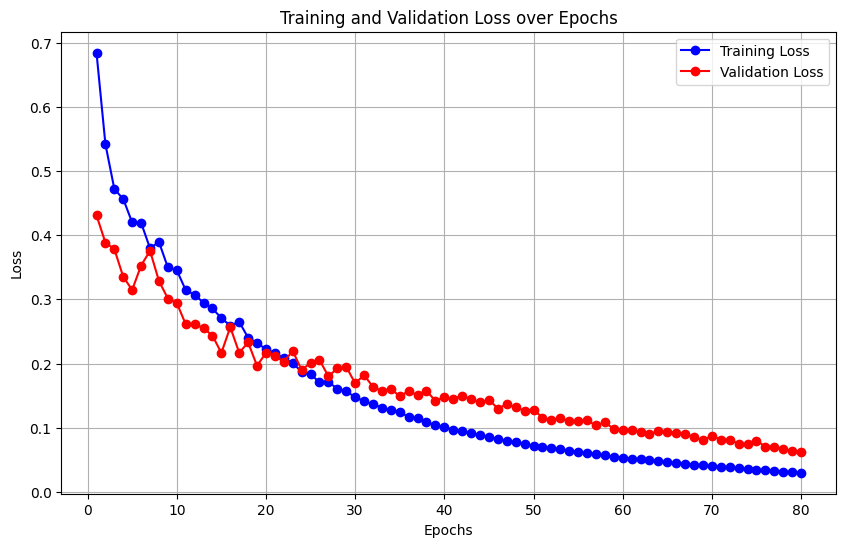

In [32]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
# It contains the training and validation loss history

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')  # 'bo-' means blue circle markers
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' means red circle markers
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


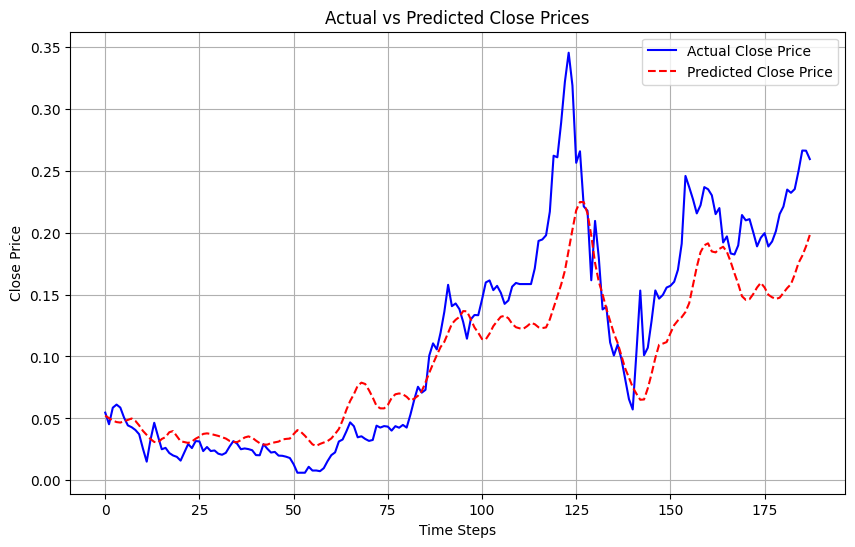

In [33]:
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test (actual close prices) and the model is already trained
# Generate predictions for the test set
y_pred = model.predict(X_test)

# Flatten the y_test and y_pred arrays (in case they are multi-dimensional)
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Plot the actual close prices vs predicted close prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='red', linestyle='--')

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import Huber
from tensorflow.keras.regularizers import l2

def build_lstm_model(input_shape, lstm_units=100, dropout_rate=0.2, dense_units=50, output_units=1, learning_rate=0.0001, loss='huber'):
    model = Sequential()

    # First LSTM layer with L2 regularization and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Second LSTM layer with L2 regularization and batch normalization
    model.add(LSTM(units=lstm_units, return_sequences=False, kernel_regularizer=l2(0.002)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Dense layer with L2 regularization and batch normalization
    model.add(Dense(units=dense_units, kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(units=output_units))

    # Compile the model with Adam optimizer and customizable learning rate
    optimizer = Adam(learning_rate=learning_rate)
    if loss == 'huber':
        model.compile(optimizer=optimizer, loss=Huber(delta=1.0))  # Huber loss is more robust to outliers
    else:
        model.compile(optimizer=optimizer, loss=loss)  # Use other loss functions if specified

    return model

# Example usage:
input_shape = (X_train.shape[1], X_train.shape[2])  # time_steps and num_features
model = build_lstm_model(input_shape, lstm_units=100, dropout_rate=0.2, dense_units=50, output_units=1, learning_rate=0.0001, loss='huber')

# EarlyStopping to monitor validation loss and stop training if it starts to overfit
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print model summary
model.summary()


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 1.3620 - val_loss: 0.5401
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.9028 - val_loss: 0.5365
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.8152 - val_loss: 0.5322
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.8319 - val_loss: 0.5259
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8314 - val_loss: 0.5272
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.8169 - val_loss: 0.5207
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.8050 - val_loss: 0.5197
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.7565 - val_loss: 0.5178
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7436 - val_loss: 0.5130
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.7362 - val_loss: 0.5095
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.7220 - val_loss: 0.5091
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 5, 100)              │          46,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 5, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,705 (1.52 MB)

 Trainable params: 132,401 (517.19 KB)

 Non-trainable params: 500 (1.95 KB)

 Optimizer params: 264,804 (1.01 MB)